# zigzag 데이터 분석

In [1]:
import os
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## 1. data 폴더의 zigzag_DB.db에 연결한 뒤 데이터베이스 스키마를 출력해주세요. 그 다음,  order 테이블을 불러와주세요.
>- timestamp; 주문시각

In [2]:
connect = sqlite3.connect(os.getcwd() + '/zigzag_DB.db')
query = 'select * from `order`'
order = pd.read_sql(query, connect)
print(order.shape)
order.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


## 2. order 테이블을 이용해 지그재그의 당일 매출 상위 10개 쇼핑몰을 구해주세요.

In [3]:
pd.pivot_table(order, index='shop_id', values='price', aggfunc='sum').sort_values(['price'], ascending=False)[:10]

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


## 3. 판매 건수를 포함하여 피벗테이블을 만들어주세요. 또한, 상위 10개 쇼핑몰의 매출을 막대그래프로 보여주세요.

In [4]:
top = pd.pivot_table(order, index='shop_id', values='price', aggfunc=['sum', 'count'])
top.columns = ['sum','count']
top = top.sort_values(['sum', 'count'], ascending=False)[:10]
top

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


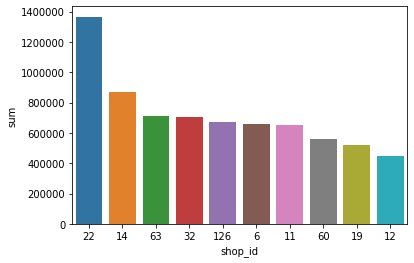

In [5]:
sns.barplot(data=top, x=top.index, y='sum', order=top.index)

## 4. 시간대별 지그재그 매출을 구하려고 합니다. lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화 해주세요.

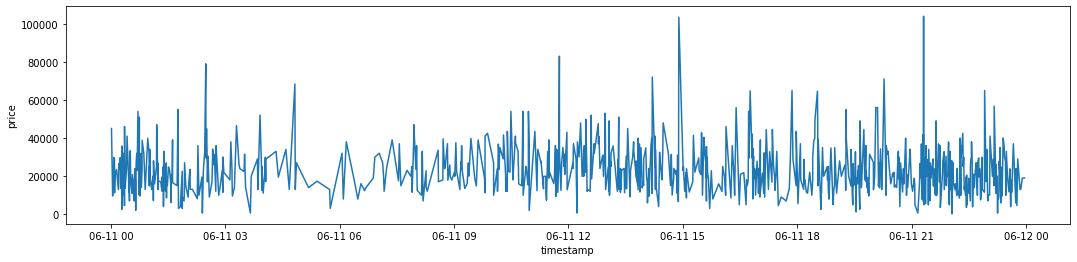

In [6]:
order['timestamp'] = pd.to_datetime(order['timestamp'])

# style set
#mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

plt.figure(figsize=(18,4))
sns.lineplot(data=order, x='timestamp', y='price')

## 5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만들어주세요.

In [7]:
# 시간대별 매출액

order['hour'] = order['timestamp'].dt.hour
time_price = pd.pivot_table(order, index='hour', values='price', aggfunc='sum')
time_price

,price
hour,
0,1479210
1,990300
2,787830
3,467650
4,304800
5,47100
6,192400
7,430300
8,437060


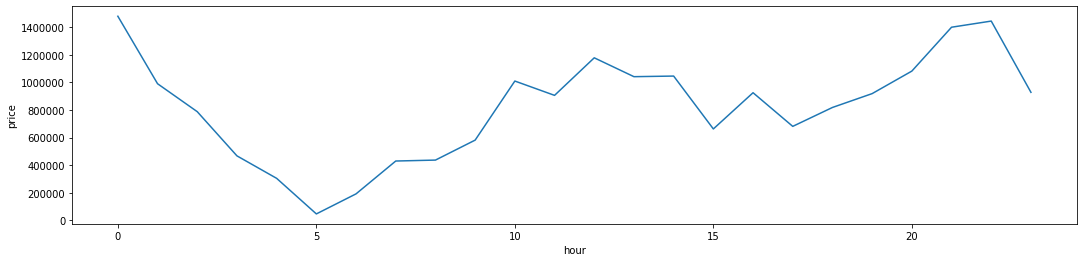

In [8]:
plt.figure(figsize=(18,4))
sns.lineplot(data=time_price, x=time_price.index, y='price')

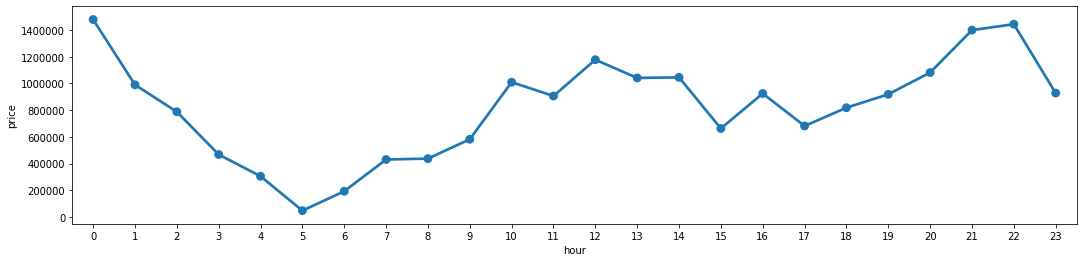

In [9]:
plt.figure(figsize=(18,4))
sns.pointplot(data=time_price, x=time_price.index, y='price')

## 6 . user 테이블을 불러와 order 테이블과 병합해주세요.

In [10]:
# user data

query = 'select * from user'
user = pd.read_sql(query, connect)
print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [11]:
# order, user data merge

order2 = pd.merge(order, user, on='user_id', how='inner')
order2.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


## 7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하여 보여주세요.
>- 쇼핑몰이 설정한 타겟 연령대와 실제 구매층 일치 비교

In [12]:
# 매출 top10 쇼핑몰 추출

order2 = order2[order2['shop_id'].isin(top.index)]

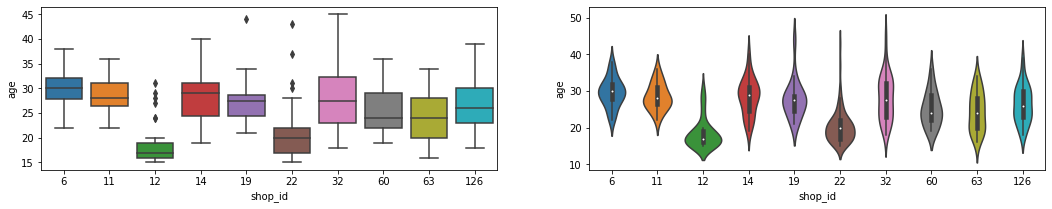

In [13]:
# 시각화 

figure, axes = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,3)

sns.boxplot(data=order2[order2['age'] != -1], x='shop_id', y='age', ax=axes[0])
sns.violinplot(data=order2[order2['age'] != -1], x='shop_id', y='age', ax=axes[1])

## 8. user 테이블에 연령대를 나타내는 칼럼을 만들어주세요. 그리고 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증해주세요.
>- 지그재그의 쇼핑몰들은 아래의 필터에서 보여지는 것과 같이 타겟 연령대를 가지고 있습니다. 하지만, 실제 구매가 설정되어 있는 타겟 연령대에 맞게 이루어지는지 꾸준히 검증이 이루어져야 합니다. 유저에게 더 적합한 제품이나 쇼핑몰을 추천해주어 유저 경험 (UX)를 증진시키는 것은 추천 플랫폼에게 매우 중요한 요소이기 때문입니다.


** 수행해야 할 작업은 총 3단계입니다.**
1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
2. shop 테이블을 불러와 user, order 테이블과 병합하기
3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

In [14]:
# 연령대 컬럼 만들기

def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

user['연령대'] = user['age'].apply(lambda x: make_generation(x))
user.head()

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반


In [15]:
# load shop table

query = 'select * from shop'
shop = pd.read_sql(query, connect)
print(shop.shape)
shop.head()

(200, 5)


,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [16]:
# user, order, shop table merge

shop_user = pd.merge(order, user, on=['user_id'], how='inner')
shop_user = pd.merge(shop_user, shop, on=['shop_id'], how='inner')
shop_user.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


In [17]:
# 실제, 쇼핑몰 연령대 일치여부

def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])
    
shop_user['거래연령 일치여부'] = shop_user.apply(lambda x: check_generation(x), axis=1)

table = pd.pivot_table(shop_user, index='shop_id', values='거래연령 일치여부', aggfunc=['mean', 'count'])
table

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1
...,...,...
191,1.000000,1
192,1.000000,2


In [18]:
# 매출액 top10만 추출

table = table[table.index.isin(top.index)]
table

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나옵니다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있습니다.

## 9. 쇼핑몰의 스타일 태그를 정리해주세요.

In [19]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

for i in style_list:
    shop[i] = shop[shop['style'].notnull()]['style'].apply(lambda x: i in x)
shop.head(3)

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,...,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## 10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드를 찾아주세요. 또한, 매출이 가장 많은 3가지 스타일의 구매 연령대 분포를 그려주세요.

In [20]:
purchase = pd.merge(order, user, on=['user_id'], how='inner')
purchase = pd.merge(purchase, shop, on=['shop_id'], how='inner')
purchase.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,...,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,...,False,False,False,False,False,False,False,False,False,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,...,False,False,False,False,False,False,False,False,False,False
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,...,False,False,False,False,False,False,False,False,False,False
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,...,False,False,False,False,False,False,False,False,False,False
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# 매출이 가장 많은 3가지 스타일

top_style = pd.DataFrame({'style': [], 'price_sum': []})
for i in range(len(style_list)):
    top_style = pd.concat([top_style, pd.DataFrame({'style': style_list[i], 
                                                    'price_sum': [purchase[purchase[style_list[i]] == True]['price'].sum()]})], ignore_index=True)
top_style = top_style.sort_values(['price_sum'], ascending=False)[:3]
print(top_style)

top_style = list(top_style['style'])

   style  price_sum
2  심플베이직  9780040.0
3    러블리  6844600.0
1   모던시크  4105100.0


/home/hyunji/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunji/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunji/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunji/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunji/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hyunji/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py

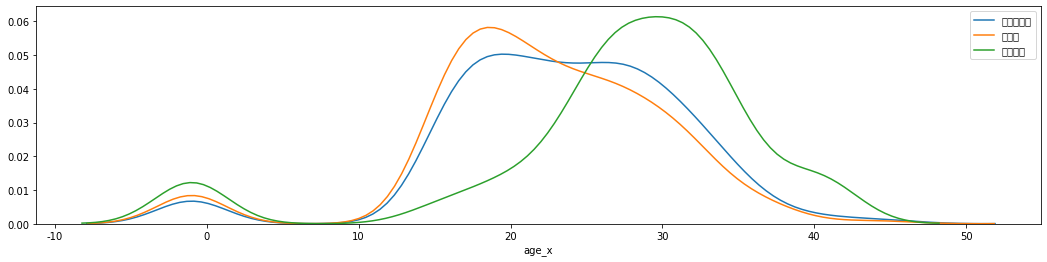

In [22]:
# 시각화

plt.figure(figsize=(18,4))

sns.distplot(purchase[purchase[top_style[0]] == True]['age_x'], hist=False, label=top_style[0])
sns.distplot(purchase[purchase[top_style[1]] == True]['age_x'], hist=False, label=top_style[1])
sns.distplot(purchase[purchase[top_style[2]] == True]['age_x'], hist=False, label=top_style[2])

## 10. DB에서 로그 데이터를 불러온 다음 timestamp 컬럼을 datetime 형식으로 바꿔주세요. 그리고 user id를 보기 쉽게 간단한 자연수 형태로 변환해주세요.

```
지그재그 로그 데이터의 명세는 다음과 같습니다.

- 컬럼 별 명세
    1. timestamp : 이벤트 발생 시간 (한국 시간 기준)
    2. user_id : 이용자 고유 식별자
    3. event_origin : 이벤트가 발생한 앱 위치
        - event_origin 값 별 의미
            a. goods_search_result : 특정 검색어의 상품 검색 결과
                (Ex: goods_search_result/반팔티)
            b. shops_ranking : '쇼핑몰 랭킹' 영역
            c. shops_bookmark : '즐겨찾기' 영역
            d. category_search_result : 카테고리 검색 결과 
                (Ex:category_search_result/상의)
            e. my_goods : '내 상품' 영역

    4. event_name : 발생한 이벤트 명
        - event_name 값 별 의미
            a. app_page_view : 앱 내 화면 이동
            b. enter_browser : 앱 내 클릭을 통해, 특정 웹페이지로 진입
            c. add_bookmark : 특정 쇼핑몰을 즐겨찾기 추가
            d. remove_bookmark : 특정 쇼핑몰을 즐겨찾기 제거
            e. add_my_goods : 특정 상품을 내 상품 추가
            f. remove_my_goods : 특정 상품을 내 상품 제거

    5. event_goods_id : 이벤트가 발생한 상품 고유 식별자
         - 상품 관련 이벤트가 아닌 경우, 공백

    6. event_shop_id : 이벤트가 발생한 쇼핑몰 고유 식별자
         - 쇼핑몰 관련 이벤트가 아닌 경우, 공백
```

In [97]:
# load log table

query = 'select * from log'
data_logs = pd.read_sql(query, connect)
print(data_logs.shape)
data_logs.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


In [99]:
data_logs['timestamp'] = pd.to_datetime(data_logs['timestamp'])

In [100]:
# user_id 정수화

user_id = pd.DataFrame({'user_id': user['user_id'].unique()}).sort_values(['user_id'])
user_id['n_user_id'] = list(range(len(user_id)))
user_id.sort_index()

,user_id,n_user_id
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,0
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,1
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,2
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,3
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,4
...,...,...
9995,zymqXr4nryoIrj8e9ToeLoNbnOfCvcsM,9995
9996,zyugPCF7YB6Fksn51adQa3CpAIn1SwIf,9996
9997,zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs,9997
9998,zznj-LHhddVvuzZmbZpw6MSylLO64982,9998


In [102]:
# user_id dictionary

id_zip = zip(user_id['user_id'], user_id['n_user_id'])
id_dict = dict(id_zip)
id_dict

{'--PYPMX8QWg0ioT5zfORmU-S5Lln0lot': 0,
 '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv': 1,
 '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN': 2,
 '-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1': 3,
 '-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k': 4,
 '-3fmY1WsLkYJwN_8lZQMmxZd6zJTAcT1': 5,
 '-3q-oynqxFEgSHUwX802hpmi1louyQNv': 6,
 '-428TMckUlhn6ptxN7gR2FGaSyXjSnaD': 7,
 '-4O8WnD8dT6nWho-4KbIm6TvnK4BmjX_': 8,
 '-4ltLPS55n6J2wSUCLxEZwxYdeW37cK5': 9,
 '-5BA0EwkyhGLCC8FxzvvDgyrZWYJM33I': 10,
 '-5Cwn2Fcx9j16QSM2-SLiaLMm0sS4E2I': 11,
 '-5o3lkvJctT3uURb5JWPVxe1VjqhyzAi': 12,
 '-622WUNWBtjX5VGKx8UnOtn2NVHD_NaB': 13,
 '-62U2A3KHjNZ2XXmOgQTSWEfPg1RRWWy': 14,
 '-63J8veARgGL3ulnRKblm4xhhwkvjKzG': 15,
 '-6UZWGgl3AAI7Df2sVWLX6oT6zP43zo0': 16,
 '-6jxyh56lSivkbLm3WNGRCmdyrdsBmNW': 17,
 '-71z4lG_D-eKnOmDCJlUaNvVcwd808yw': 18,
 '-75tFsDSoUwapUvwCUHTZiGTGkaSDleQ': 19,
 '-7SKUZkBmbG2ZMvJ0E0jmMDcd8PgmARb': 20,
 '-7uBbvfy4gff6mHV9XotjVO2YlCY2r8v': 21,
 '-8htVW7UIA8qRupSdCx-6PzIXLI_vk2p': 22,
 '-9qbSavSdufdw9JwmiWX1_URT2E2QxFZ': 23,
 '-Ae6T8G5uAZldwUEOTMR-KzG

In [103]:
data_logs['n_user_id'] = data_logs['user_id'].map(id_dict)
order['n_user_id'] = order['user_id'].map(id_dict)
user['n_user_id'] = user['user_id'].map(id_dict)

## 12. 주문 데이터, 로그 데이터를 concat해주세요.

In [110]:
print(order.shape)
order.head()

(867, 7)


,timestamp,user_id,goods_id,shop_id,price,hour,n_user_id
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,6241
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,8899
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,2527
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,3387
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,7832


In [105]:
data_logs[data_logs['user_id'] == 'bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx']

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6241
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,6241
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6241
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6241


In [113]:
# order, data_logs table concat
# ** 로그가 없는 사용자는 제외 -> 잔존시간 계산에 오류를 일으키므로

data = pd.concat([order[order['user_id'].isin(data_logs['user_id'])], data_logs], ignore_index=True).sort_values(['user_id','timestamp']).reset_index(drop=True)
data.head(20)

,timestamp,user_id,goods_id,shop_id,price,hour,n_user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,NaN,NaN,NaN,NaN,0,shops_bookmark,app_page_view,NaN,NaN
1,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,NaN,NaN,NaN,NaN,0,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,NaN,NaN,NaN,NaN,1,my_goods,app_page_view,NaN,NaN
3,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,NaN,NaN,NaN,NaN,1,my_goods,enter_browser,2506.0,40.0
4,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,NaN,NaN,NaN,NaN,1,my_goods,app_page_view,NaN,NaN
5,2018-06-11 01:11:03.608,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,NaN,NaN,NaN,NaN,1,my_goods,app_page_view,NaN,NaN
6,2018-06-11 01:11:05.713,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,NaN,NaN,NaN,NaN,1,my_goods,app_page_view,NaN,NaN
7,2018-06-11 01:12:09.565,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,NaN,NaN,NaN,NaN,1,my_goods,app_page_view,NaN,NaN
8,2018-06-11 01:12:28.850,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,NaN,NaN,NaN,NaN,1,my_goods,app_page_view,NaN,NaN
9,2018-06-11 02:21:04.848,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,NaN,NaN,NaN,NaN,2,my_goods,app_page_view,NaN,NaN


In [121]:
#order.user_id.nunique()
len(set(order['user_id']))

832

In [122]:
#data.user_id.nunique()
len(set(data['user_id']))

9909

In [123]:
#data[data['price'].notnull()].user_id.nunique()
len(set(order['user_id']) & set(data['user_id']))

742

In [124]:
order.head(3)

,timestamp,user_id,goods_id,shop_id,price,hour,n_user_id
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,6241
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,8899
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,2527
